In [1]:
# 导入必要的各种包
import pandas as pd
from pandas.core.api import DataFrame
import matplotlib.pyplot as plt
from pyreadstat import pyreadstat
import mytools

In [2]:
# 打开数据文档
df0,metadata =pyreadstat.read_sav(R"data\indentity问卷数据原始数据.sav",apply_value_formats=True)
# 使用自定义工具包中的函数读取spss格式文件
df1,metadata = mytools.read_spss(R"data\indentity问卷数据原始数据.sav")

In [3]:
# 清理数据
## 清理空白值
### 查看所有空白值
temp = df1[df1.isnull().T.any()]

In [4]:
### 删除指定的空白值
"""
## 使用dropna方法删除空值 #card

1. `axis`，用于指定操作行还是列。`0`代表行，`1`代表列，默认为`0`。
2. `how`，其值为`"any"`和`"all"`，`"any"`表示只要有空值，就删除。`"all"`表示一行或一列的所有值为空才删除。默认为`"any"`。
3. `thresh`，表示保留至少含有`n`个非`na`数值的行或列。默认为`None`。
4. `subset`，用来指定在那些列中查找缺失值。例如`df.dropna(subset=['name', 'born'])`表示删除在`'name'`和` 'born'`列含有缺失值的行。默认为`None`。
5. `inplace`，表示是否直接在原DataFrame修改。默认为`False`，即不修改原数据框。
"""
df2 = df1.dropna(thresh=15)

In [5]:
### 如果要删除所有空值，执行下面语句即可
df3 = df2.dropna()

In [6]:
## 删除重复值
df4 = df3.drop_duplicates(subset=['问卷编号'],keep='first')

In [7]:
## 检查数据类型

### 查看所有变量的数据类型
df4.dtypes.to_frame()
### 使用dtypes属性可以查看所有变量或指定变量的类型。
### 使用to_frame方法的目的在于输出更加整洁的文本，非必须。

0
问卷编号                    float64
调查员                      object
民族                     category
政治面貌                   category
年级                     category
您觉得自己是个典型的中国人吗         category
与世界其他国家的人相比中国人有自己的特点吗  category
做为公民，最基本的要求是爱自己的国家     category
都是中华民族的一员              category
为中华民族的历史文化而骄傲          category
与中华民族的命运息息相关           category
你是否了解中华民族的传统节日         category
了解中国历史、地理、政治等          category
您觉得中国怎么样               category
您认为中国有多少值得自豪的地方        category
您认为世界有多少比例的人尊重中国       category
对您而言作为一名中国人有多重要        category
会以中国人自豪吗               category
会隐瞒身份吗                 category
会打多少分                  category
国歌升起                   category
世博会                    category
中国传统文化                 category
发展信心                   category
你会为中国运动员呐喊助威           category
遇到灾难时中国人应该伸出援手         category
你愿意加入其他国籍吗             category
中国人要为祖国统一奋斗吗           category

In [8]:
### 使用astypes方法设定变量的类型
df5 = df4.astype({'问卷编号':'int'})
df5.dtypes.to_frame()

0
问卷编号                      int32
调查员                      object
民族                     category
政治面貌                   category
年级                     category
您觉得自己是个典型的中国人吗         category
与世界其他国家的人相比中国人有自己的特点吗  category
做为公民，最基本的要求是爱自己的国家     category
都是中华民族的一员              category
为中华民族的历史文化而骄傲          category
与中华民族的命运息息相关           category
你是否了解中华民族的传统节日         category
了解中国历史、地理、政治等          category
您觉得中国怎么样               category
您认为中国有多少值得自豪的地方        category
您认为世界有多少比例的人尊重中国       category
对您而言作为一名中国人有多重要        category
会以中国人自豪吗               category
会隐瞒身份吗                 category
会打多少分                  category
国歌升起                   category
世博会                    category
中国传统文化                 category
发展信心                   category
你会为中国运动员呐喊助威           category
遇到灾难时中国人应该伸出援手         category
你愿意加入其他国籍吗             category
中国人要为祖国统一奋斗吗           category

In [9]:
"""
异常值清理

类别变量异常值的查看及修改

使用value_counts方法可以查看类别变量的取值及次数
"""
df5['发展信心'].value_counts()


很有信心     486
担忧不好说    279
不清楚       54
没信心       40
Name: 发展信心, dtype: int64

In [10]:
""" 列出所有类别变量 """
for col in df5.columns[df5.dtypes=='category']:
    print(df5[col].value_counts())

汉族      363
回族      131
藏族       50
蒙古族      50
壮族       47
土家族      46
维吾尔族     45
苗族       34
彝族       15
白族       15
满族       11
哈萨克族     10
瑶族        8
布依族       7
侗族        5
东乡族       4
黎族        3
哈尼族       3
水族        2
仫佬族       2
羌族        2
畲族        1
土族        1
其他        1
保安族       1
裕固族       1
毛难族       1
Name: 民族, dtype: int64
团员    631
党员    112
群众     95
其他     21
Name: 政治面貌, dtype: int64
大一      306
大二      274
大三      170
大四       94
预科       14
22.0      1
Name: 年级, dtype: int64
完全是     391
可以算     249
一般般     137
不太算      56
完全不是     26
Name: 您觉得自己是个典型的中国人吗, dtype: int64
较有特点     354
非常有特点    321
一般般      126
较无特点      34
毫无特点      24
Name: 与世界其他国家的人相比中国人有自己的特点吗, dtype: int64
完全同意     358
同意       346
有点同意     108
不同意       29
完全不同意     18
Name: 做为公民，最基本的要求是爱自己的国家, dtype: int64
完全同意     458
同意       279
有点同意      83
不同意       22
完全不同意     17
Name: 都是中华民族的一员, dtype: int64
同意       339
完全同意     230
有点同意     200
不同意       73
完全不同意     17
Name: 为中华民族的历史文化而骄傲, dtype:

In [11]:
### 使用自定义函数打印初全部类别变量取值
mytools.print_all_cats(df5)

汉族      363
回族      131
藏族       50
蒙古族      50
壮族       47
土家族      46
维吾尔族     45
苗族       34
彝族       15
白族       15
满族       11
哈萨克族     10
瑶族        8
布依族       7
侗族        5
东乡族       4
黎族        3
哈尼族       3
水族        2
仫佬族       2
羌族        2
畲族        1
土族        1
其他        1
保安族       1
裕固族       1
毛难族       1
Name: 民族, dtype: int64
团员    631
党员    112
群众     95
其他     21
Name: 政治面貌, dtype: int64
大一      306
大二      274
大三      170
大四       94
预科       14
22.0      1
Name: 年级, dtype: int64
完全是     391
可以算     249
一般般     137
不太算      56
完全不是     26
Name: 您觉得自己是个典型的中国人吗, dtype: int64
较有特点     354
非常有特点    321
一般般      126
较无特点      34
毫无特点      24
Name: 与世界其他国家的人相比中国人有自己的特点吗, dtype: int64
完全同意     358
同意       346
有点同意     108
不同意       29
完全不同意     18
Name: 做为公民，最基本的要求是爱自己的国家, dtype: int64
完全同意     458
同意       279
有点同意      83
不同意       22
完全不同意     17
Name: 都是中华民族的一员, dtype: int64
同意       339
完全同意     230
有点同意     200
不同意       73
完全不同意     17
Name: 为中华民族的历史文化而骄傲, dtype:

In [12]:
### 找出类别变量的异常值并修改
df5.query('年级==22')
df5.loc[749,'年级'] = '大二'

In [13]:
### 找出类别变量的异常值并修改
df5.query('国歌升起==5')
df5.loc[409,'国歌升起'] = '感到非常激动'

In [14]:
### 找出类别变量的异常值并修改
df5.query('世博会==5')
df5.loc[158,'世博会'] = '感到自豪'

In [15]:
### 找出类别变量的异常值并修改
df5.query('中国人要为祖国统一奋斗吗==55')
df5.loc[188,'中国人要为祖国统一奋斗吗'] = '很赞同'

In [16]:
### 查看数值变量的异常值
### 使用describe方法对数值变量进行描述统计，可得到最小值、最大值、方差等信息
df5['问卷编号'].describe()

count    859.000000
mean     455.071013
std      259.316464
min        1.000000
25%      231.500000
50%      460.000000
75%      679.500000
max      900.000000
Name: 问卷编号, dtype: float64

In [17]:
### 使用自定义函数对不同类型的数值变量进行描述统计
mytools.print_all_int(df5)
mytools.print_all_float(df5)

count    859.000000
mean     455.071013
std      259.316464
min        1.000000
25%      231.500000
50%      460.000000
75%      679.500000
max      900.000000
Name: 问卷编号, dtype: float64


In [18]:
## 逻辑一致性清理
### 构造逻辑判断表达式
c1 = '会以中国人自豪吗 == "会" and 会隐瞒身份吗 == "一定会"'
### 筛选出满足条件的数据
temp = df5.query(c1)[['会以中国人自豪吗','会隐瞒身份吗']]
### 删除满足上述条件的数据
df6 = df5.drop(temp.index)

In [19]:
c2 = '对您而言作为一名中国人有多重要 == "十分重要" and 你愿意加入其他国籍吗 == "毫不犹豫加入"'
temp = df6.query(c2)[['对您而言作为一名中国人有多重要','你愿意加入其他国籍吗']]
### 删除满足上述条件的数据
df7 = df6.drop(temp.index)

In [20]:
# 数据清理完毕
df = df7.copy()

In [21]:
# 描述统计
## 单变量描述统计
### 无序类别变量（定类变量）描述统计，
### 可使用频数频率表、众数、柱状图等方式进行描述
result = df['政治面貌'].value_counts()

In [22]:
b = pd.DataFrame()
b['政治面貌'] = df['政治面貌'].value_counts().index
b['个数'] = df['政治面貌'].value_counts().values
b['百分比'] = df['政治面貌'].value_counts(normalize=True).values * 100
# b['百分比'] = b['百分比'].apply(lambda x: round(x, 2))
total_row = pd.Series({'政治面貌':'总和','个数':b['个数'].sum(),'百分比':b['百分比'].sum()}).to_frame().T
temp = pd.concat([b,total_row],ignore_index=True)
temp['百分比'] = temp['百分比'].apply(lambda x: round(x, 2))
temp

政治面貌   个数     百分比
0   团员  605   73.51
1   党员  106   12.88
2   群众   94   11.42
3   其他   18    2.19
4   总和  823  100.00

In [23]:
mytools.gen_percent_table(df,'政治面貌')

政治面貌   个数     百分比
0   团员  605   73.51
1   党员  106   12.88
2   群众   94   11.42
3   其他   18    2.19
4   总和  823  100.00

In [24]:
mytools.gen_percent_table(df,'民族')

民族   个数     百分比
0     汉族  342   41.56
1     回族  127   15.43
2     藏族   49    5.95
3    蒙古族   49    5.95
4     壮族   47    5.71
5    土家族   43    5.22
6   维吾尔族   42    5.10
7     苗族   32    3.89
8     彝族   15    1.82
9     白族   15    1.82
10    满族   11    1.34
11  哈萨克族   10    1.22
12    瑶族    8    0.97
13   布依族    7    0.85
14    侗族    5    0.61
15   东乡族    4    0.49
16    黎族    3    0.36
17    水族    2    0.24
18   仫佬族    2    0.24
19    羌族    2    0.24
20   哈尼族    2    0.24
21    畲族    1    0.12
22    土族    1    0.12
23    其他    1    0.12
24   保安族    1    0.12
25   裕固族    1    0.12
26   毛难族    1    0.12
27    总和  823  100.00

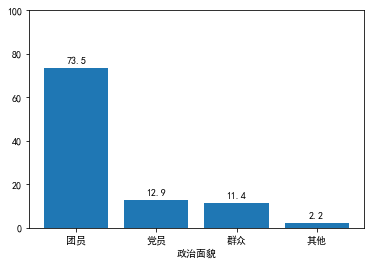

In [25]:
## 调用外部自定义函数绘制柱状图
mytools.show_bar(df,'政治面貌')

In [26]:
metadata.variable_value_labels['年级'].values()
df = mytools.set_ordered_by_meta(metadata,df,'年级')

In [27]:
## 单变量描述统计
### 有序类别变量（定序变量）描述统计，
### 可使用频数频率表（累计频率）、众数、柱状图等方式进行描述
from pandas.api.types import CategoricalDtype
# 设定有序变量
cat_dtype = CategoricalDtype(
    categories=['预科','大一', '大二','大三', '大四'], ordered=True)
df = df.astype({'年级':cat_dtype})
mytools.ordinal_desc(df,'年级')

年级   个数     百分比  累计百分比（%）
0  预科   14    1.70      1.70
1  大一  285   34.63     36.33
2  大二  264   32.08     68.41
3  大三  167   20.29     88.70
4  大四   93   11.30    100.00
5  总和  823  100.00       NaN

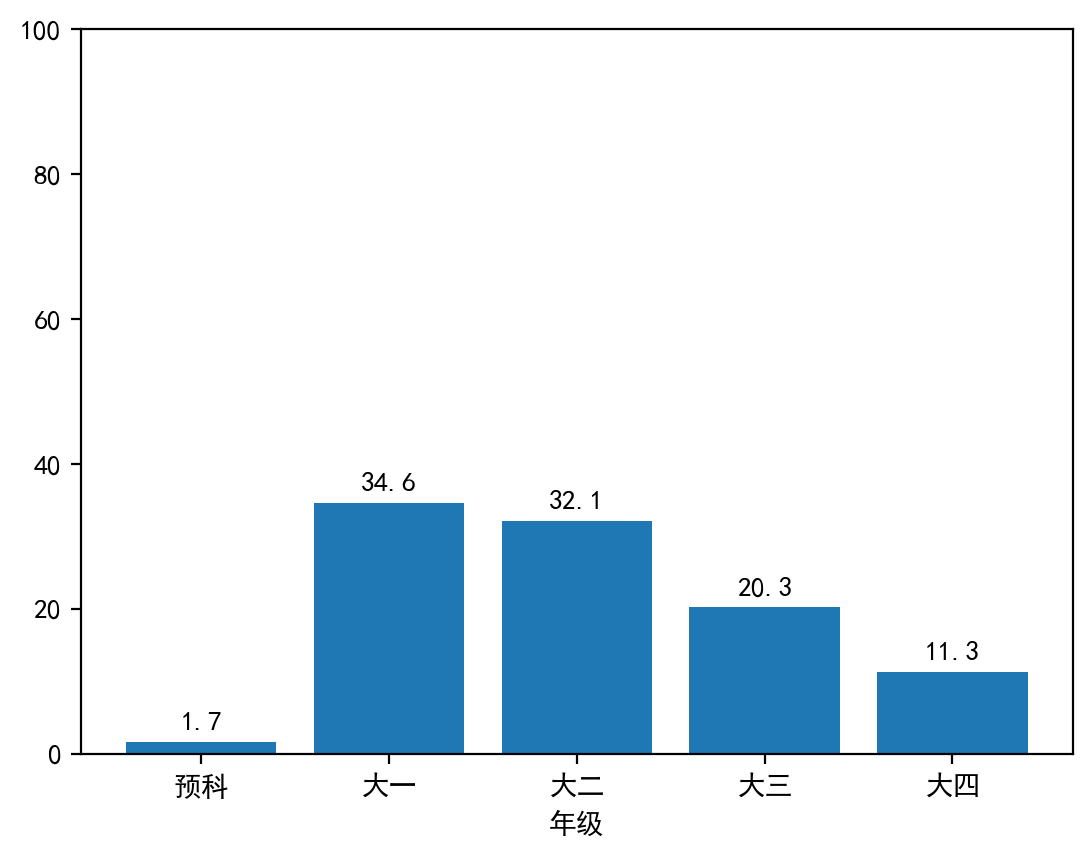

In [28]:
mytools.show_bar(df,'年级',sort=False)


In [29]:
## 单变量描述统计
### 数值变量描述统计，
### 可使用直方图、平均值、极差、四分位值等方式进行描述
df['认知维度']= df['您觉得自己是个典型的中国人吗'].cat.codes + df['与世界其他国家的人相比中国人有自己的特点吗'].cat.codes + df['做为公民，最基本的要求是爱自己的国家'].cat.codes
df['认知维度'].describe()

count    823.000000
mean       7.561361
std        2.736313
min        0.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       12.000000
Name: 认知维度, dtype: float64

<AxesSubplot:xlabel='认知维度', ylabel='Count'>

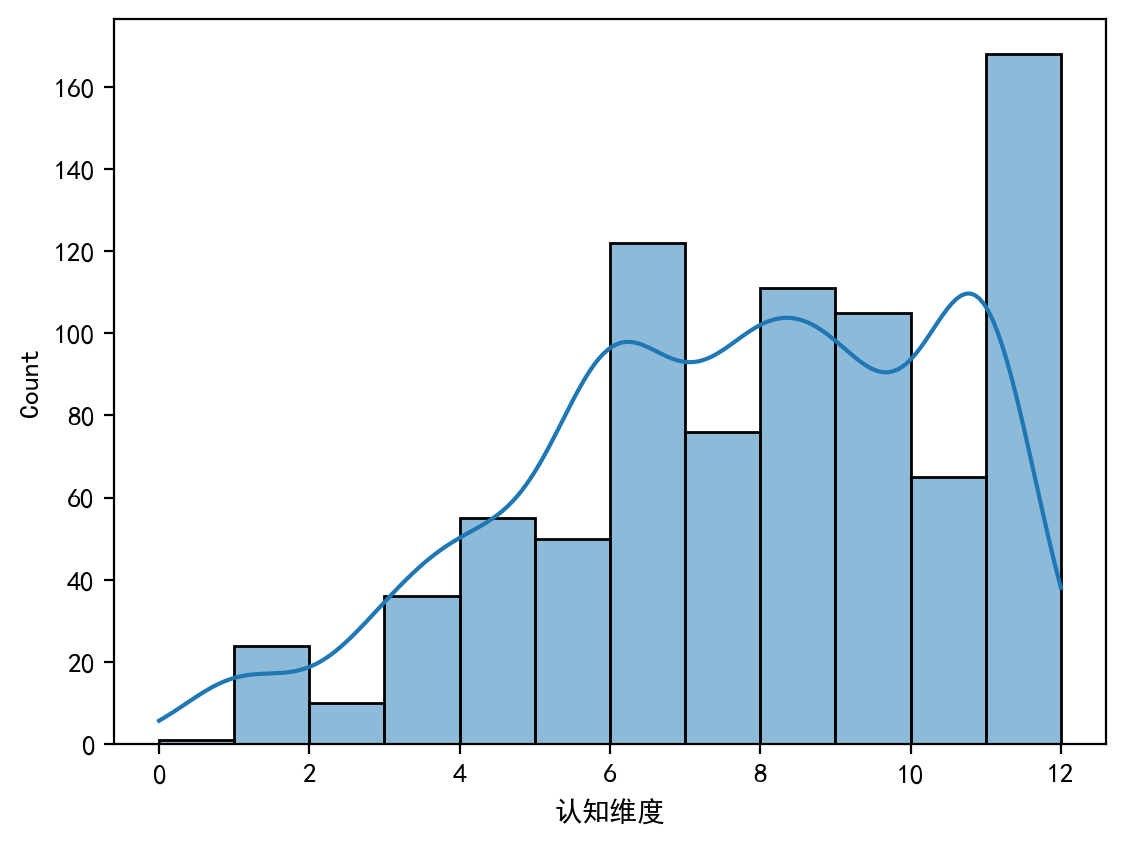

In [30]:
### 绘制直方图
import seaborn as sns
sns.histplot(data=df, x="认知维度",binwidth=1,kde=True)

In [31]:
# 描述统计
## 双变量描述统计
### 定类与定类
result = pd.crosstab(
        df['会打多少分'],
        df['政治面貌'],
        normalize='columns',
        margins=True,
        margins_name='合计',
    )*100

In [32]:
result.round(2)

政治面貌      党员     其他     团员     群众     合计
会打多少分                                   
20~40   1.89   0.00   3.47   4.26   3.28
八十到一百  24.53  22.22  27.93  20.21  26.49
六十到八十  42.45  44.44  49.92  46.81  48.48
四十到六十  26.42  33.33  15.87  25.53  18.71
零到二十    4.72   0.00   2.81   3.19   3.04

In [33]:

tau_y = mytools.goodmanKruska_tau_y(df, '政治面貌', '会打多少分')
F'tau_y值为：{tau_y:.3f}，该值属于{mytools.draw_on_corr(tau_y)}。'

'tau_y值为：0.006，该值属于极弱相关或不相关。'

In [46]:
metadata.variable_value_labels['会打多少分'].values()

dict_values(['零到二十', '20~40', '四十到六十', '六十到八十', '八十到一百'])

In [35]:
### 定序与定序
### 一定要注意参与运算的数据必须为定序变量

cat_dtype = CategoricalDtype(
    categories=['零到二十','20~40', '四十到六十','六十到八十', '八十到一百'], ordered=True)
df = df.astype({'会打多少分':cat_dtype})

result = pd.crosstab(
        df['会打多少分'],
        df['年级'],
        normalize='columns',
        margins=True,
        margins_name='合计',
    )*100
result.round(2)

年级        预科     大一     大二     大三     大四     合计
会打多少分                                          
零到二十    0.00   1.75   4.17   4.19   2.15   3.04
20~40   0.00   3.16   4.92   1.80   2.15   3.28
四十到六十  35.71  12.98  23.86  19.76  17.20  18.71
六十到八十  50.00  53.33  42.05  51.50  46.24  48.48
八十到一百  14.29  28.77  25.00  22.75  32.26  26.49

In [36]:
import scipy.stats as stats
# 取得各个定序变量
x = df['年级'].cat.codes
y = df['会打多少分'].cat.codes
dy = stats.somersd(x, y)
# 打印萨莫司dy的值
dy.statistic

-0.027250783174111757

In [37]:
p = dy.pvalue
f"萨莫司dy值为：{dy.statistic:.3f}，该值属于{mytools.draw_on_corr(dy.statistic)}，p值为{p:.3f}，{mytools.p_result(p)['conclusion']}"

'萨莫司dy值为：-0.027，该值属于极弱相关或不相关，p值为0.323，接收虚无假设，拒绝研究假设。'

In [38]:
## 构造另一个定距变量
df['情感维度']= df['您认为中国有多少值得自豪的地方'].cat.codes + df['会以中国人自豪吗'].cat.codes + df['国歌升起'].cat.codes

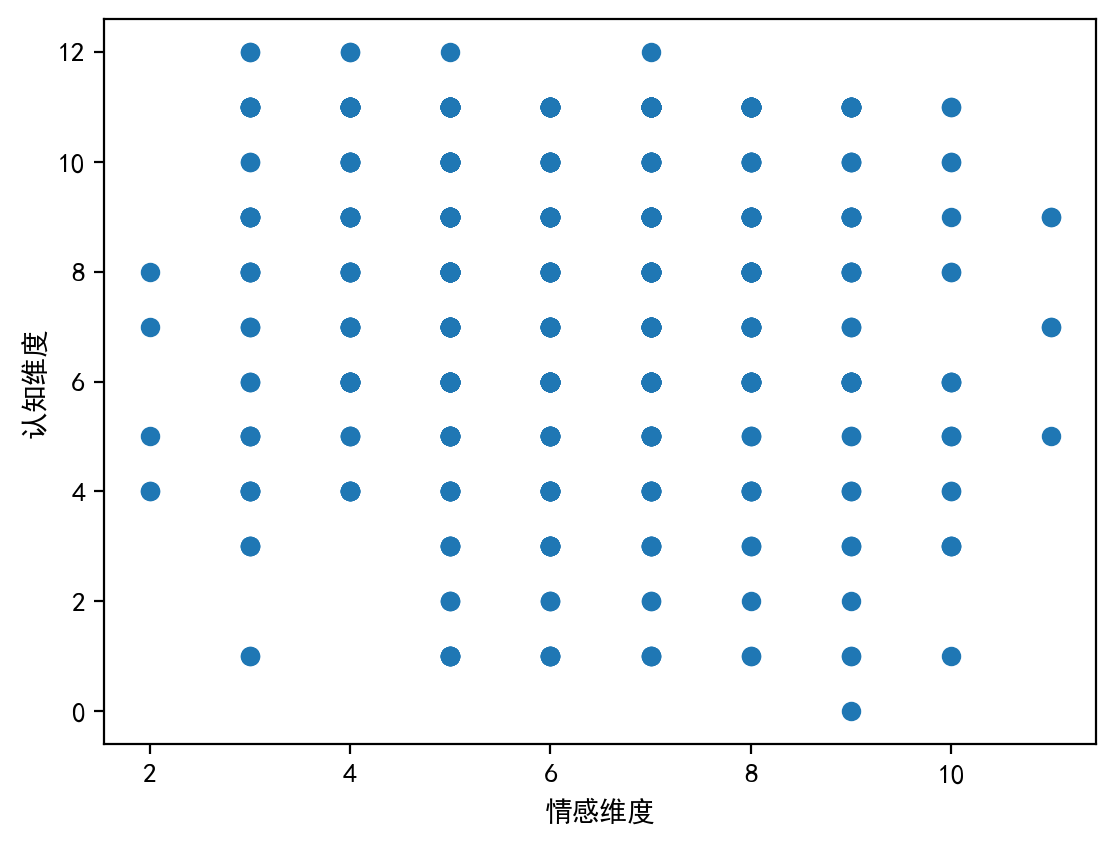

In [39]:
### 定距与定距
mytools.gen_scatter(df,'情感维度','认知维度')

In [40]:
r, p = stats.pearsonr(df['情感维度'], df['认知维度'])
f"积矩相关系数r为：{r:.3f}，决定系数r平方为：{r*r:.3f}，相关强度为{mytools.draw_on_r(r*r)}。"

'积矩相关系数r为：-0.008，决定系数r平方为：0.000，相关强度为极弱相关或不相关。'

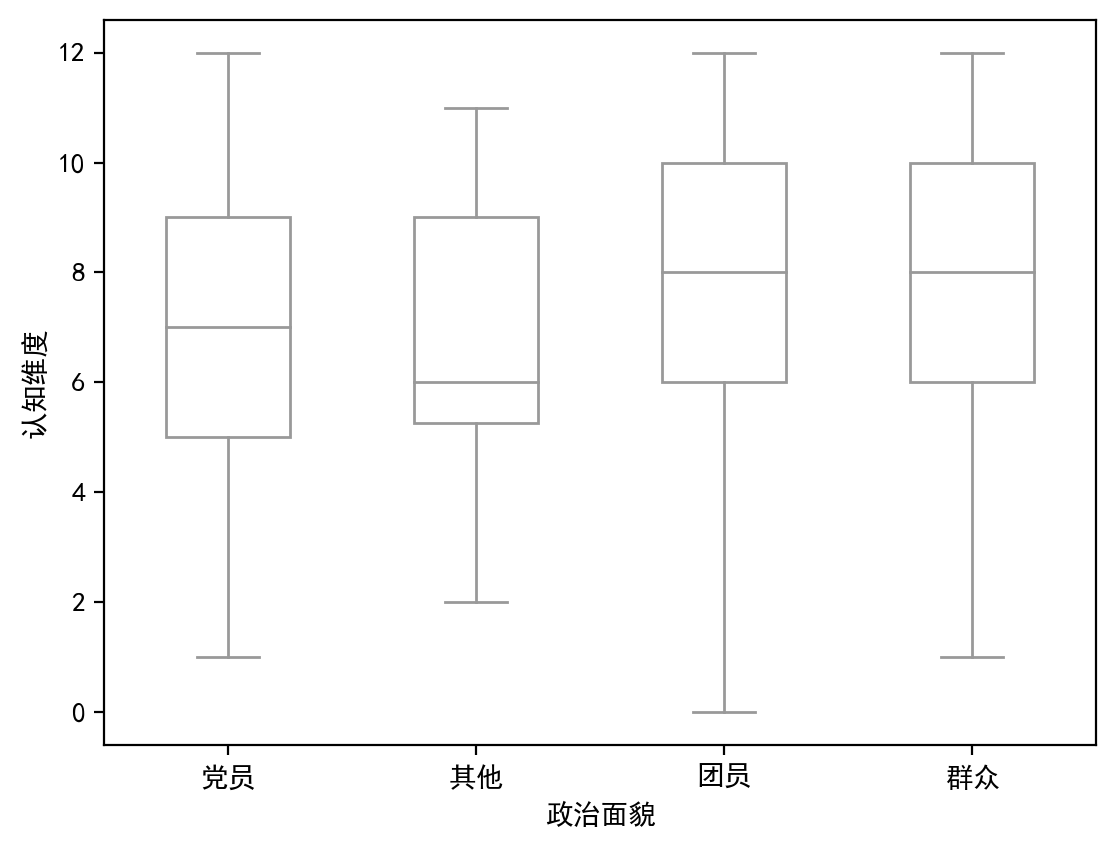

In [41]:
### 定类与定距

sns.boxplot(
        x='政治面貌',
        y='认知维度',
        data=df,
        color='white',
        linewidth=1,
        width=0.5,
    )
plt.show()

In [42]:
# 计算相关比率
from statsmodels.formula.api import ols
model = ols('认知维度 ~ 政治面貌', df).fit()
eta_2 = model.rsquared
f"""相关比率为：{eta_2:.3f}，按照J.Cohen 提出的标准(0.01时为小效应，0.06时为中等效应，而0.14为大效应)，强度为{mytools.draw_on_eta2(eta_2)}。"""

'相关比率为：0.009，按照J.Cohen 提出的标准(0.01时为小效应，0.06时为中等效应，而0.14为大效应)，强度为极弱相关或不相关。'

In [43]:
df_clean = mytools.set_label_to_code(df, metadata)

In [44]:
mytools.to_sav(df_clean,metadata,'./data/indentity问卷数据数据清理后.sav')